In [14]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np

mpl.rcParams['figure.dpi'] = 150

sns.set_style("whitegrid")

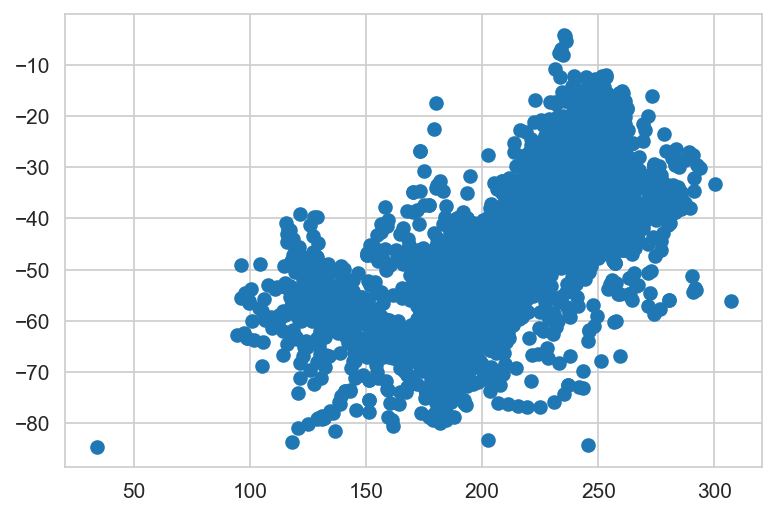

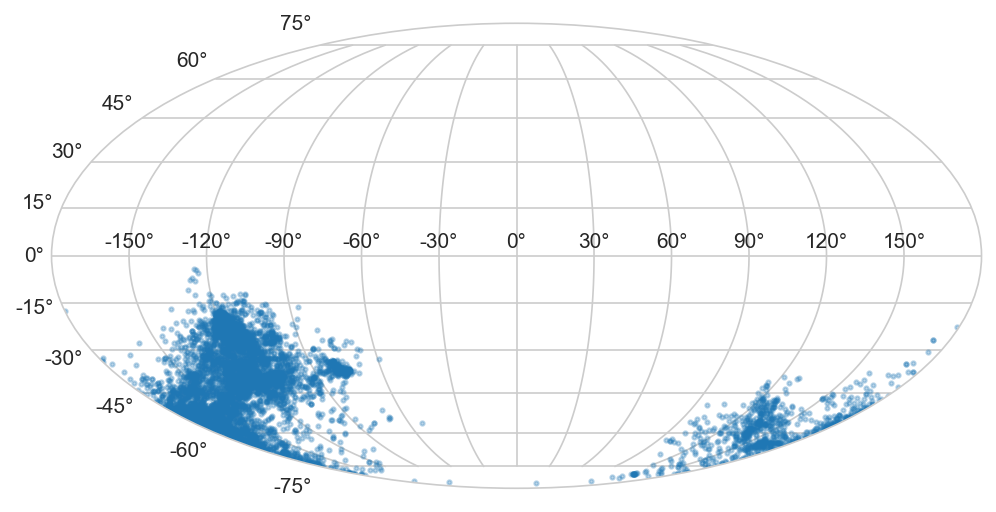

In [13]:
tmp = pd.read_csv('../data/bouma_data/kerr21_scocen.csv')
tmp.head()

ra = tmp.RAdeg
dec = tmp.DEdeg

from astropy.coordinates import SkyCoord  # High-level coordinates
from astropy.coordinates import ICRS, Galactic, FK4, FK5  # Low-level frames
from astropy.coordinates import Angle, Latitude, Longitude  # Angles
import astropy.units as u

c = SkyCoord(ra, dec, frame="icrs", unit="deg")

ra_rad = c.ra.wrap_at(180 * u.deg).radian
dec_rad = c.dec.radian

# ra_rad = coord.Angle(ra*u.degree)
# ra_rad = ra_rad.wrap_at(180*u.degree)
# dec_rad = coord.Angle(dec*u.degree)


plt.scatter(tmp.RAdeg, tmp.DEdeg)
plt.show()

plt.figure(figsize=(8,4.2))
plt.subplot(111, projection="mollweide")
#plt.title("Aitoff projection of our random data")
#plt.xticks(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
plt.grid(True)
plt.plot(ra_rad, dec_rad, 'o', markersize=2, alpha=0.3)
plt.subplots_adjust(top=0.95,bottom=0.0)
plt.show()

# Quick Kepmag to T mag conversion

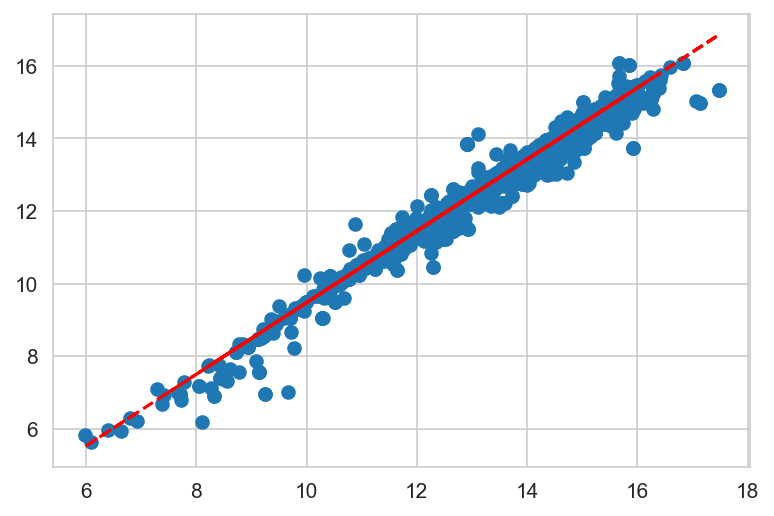

In [26]:
phot = pd.read_csv('../data/photometry.csv', skiprows=63)
phot.head()

x = phot['sy_kepmag']
y = phot['sy_tmag']

arg = (np.isfinite(x))&(np.isfinite(y))

z = np.polyfit(x[arg], y[arg], 1)
p = np.poly1d(z)

plt.scatter(x, y)
plt.plot(x, p(x), 'r--')
plt.show()

# SMEX noise curve from Luke Bouma

In [27]:
smex = pd.read_csv('../data/bouma_data/smex.csv')
smex.head()

,N_pix,T_mag,noise,noise_star,noise_sky,noise_ro,noise_sys
0,35,4.00,0.00005,0.000002,1.621000e-08,1.326000e-08,0.00005
1,35,4.05,0.00005,0.000002,1.697000e-08,1.389000e-08,0.00005
2,35,4.10,0.00005,0.000002,1.777000e-08,1.454000e-08,0.00005
3,35,4.15,0.00005,0.000002,1.861000e-08,1.523000e-08,0.00005
4,35,4.20,0.00005,0.000003,1.948000e-08,1.595000e-08,0.00005


# TESS noise curve from Luke Bouma

In [28]:
tess = pd.read_csv('../data/bouma_data/tess.csv')
tess.head()

,N_pix,T_mag,noise,noise_star,noise_sky,noise_ro,noise_sys
0,35,4.00,0.000061,0.000009,2.269000e-07,2.122000e-07,0.00006
1,35,4.05,0.000061,0.000009,2.376000e-07,2.222000e-07,0.00006
2,35,4.10,0.000061,0.000010,2.488000e-07,2.327000e-07,0.00006
3,35,4.15,0.000061,0.000010,2.605000e-07,2.436000e-07,0.00006
4,35,4.20,0.000061,0.000010,2.728000e-07,2.551000e-07,0.00006


# Kepler Q1-Q17 DR25

<Table length=200038>
      name       dtype    unit     class     n_bad 
--------------- ------- ------- ------------ ------
          kepid   int64               Column      0
 tm_designation   str25         MaskedColumn    569
           teff   int64       K       Column      0
      teff_err1   int64       K MaskedColumn   3186
      teff_err2   int64       K MaskedColumn   3449
           logg float64 cm / s2       Column      0
      logg_err1 float64 cm / s2 MaskedColumn   3186
      logg_err2 float64 cm / s2 MaskedColumn   3186
            feh float64     dex       Column      0
       feh_err1 float64     dex MaskedColumn   3186
       feh_err2 float64     dex MaskedColumn   3186
           mass float64   solar MaskedColumn   2942
      mass_err1 float64   solar MaskedColumn   3190
      mass_err2 float64   solar MaskedColumn   3187
         radius float64   solar       Column      0
    radius_err1 float64   solar MaskedColumn   3186
    radius_err2 float64   solar MaskedColu

[]

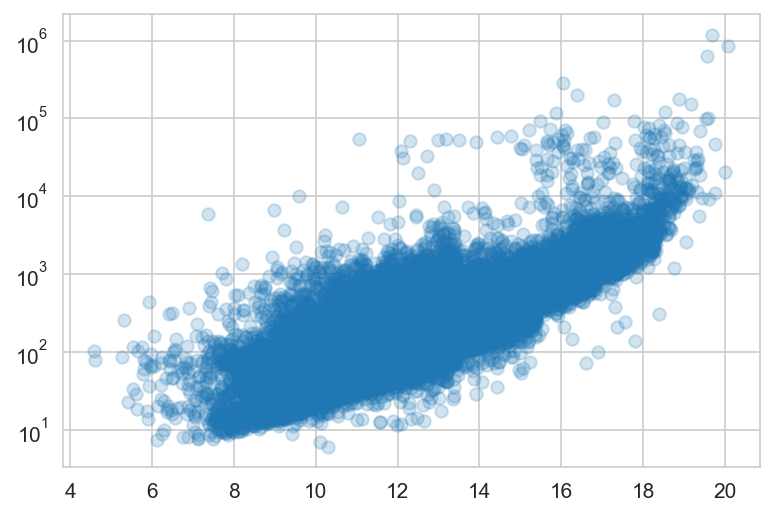

In [32]:
from astropy.io import ascii
kep = ascii.read("/Users/tdavid/Dropbox (Simons Foundation)/multis/data/Kepler-Q1-Q17-DR25-KOI.txt")
kep.info()

kep['Tmag'] = p(kep['kepmag'])
plt.scatter(kep['Tmag'], kep['rrmscdpp01p5'], alpha=0.2)
plt.semilogy()

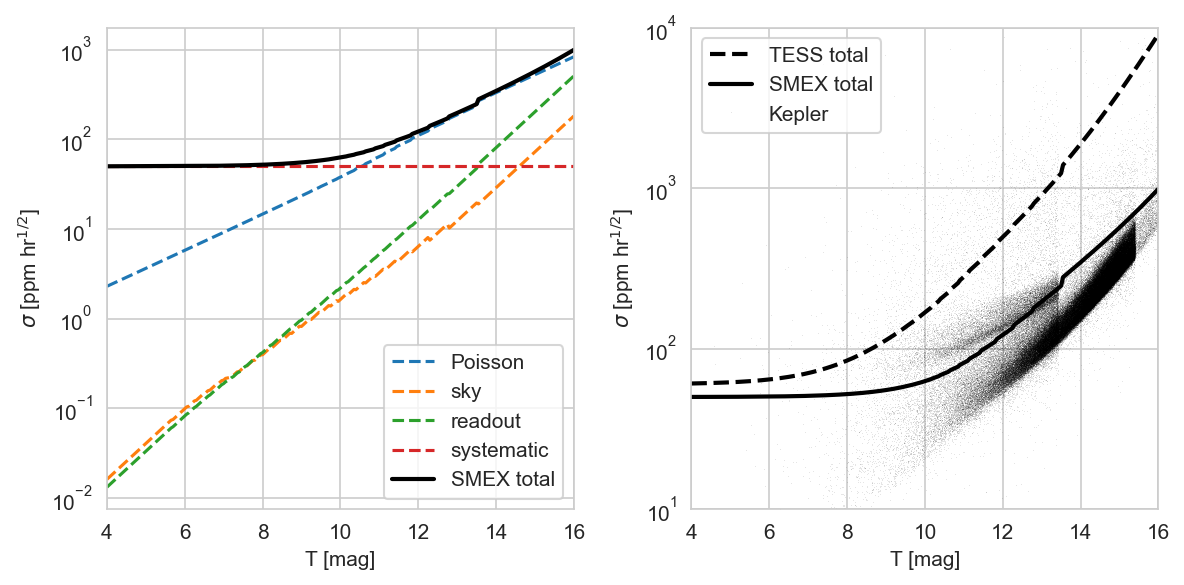

In [67]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(8,4))


ax1.plot(smex['T_mag'], 1e6*smex['noise_star'], ls='--', label='Poisson')
ax1.plot(smex['T_mag'], 1e6*smex['noise_sky'], ls='--', label='sky')
ax1.plot(smex['T_mag'], 1e6*smex['noise_ro'], ls='--', label='readout')
ax1.plot(smex['T_mag'], 1e6*smex['noise_sys'], ls='--', label='systematic')
ax1.plot(smex['T_mag'], 1e6*smex['noise'], 'k', label='SMEX total', lw=2)
ax1.legend()
ax1.set_xlim(4,16)
ax1.semilogy()
ax1.set_xlabel(r"T [mag]")
ax1.set_ylabel(r"$\sigma$ [ppm hr$^{1/2}$]")

#ax2.plot(smex['T_mag'], 1e6*smex['noise']*np.sqrt(1.5), 'k', label='SMEX total', lw=2)
#ax2.plot(tess['T_mag'], 1e6*tess['noise']*np.sqrt(1.5), 'k--', label='TESS total', lw=2)


ax2.plot(tess['T_mag'], 1e6*tess['noise'], 'k--', label='TESS total', lw=2)
ax2.plot(smex['T_mag'], 1e6*smex['noise'], 'k', label='SMEX total', lw=2)
ax2.plot(kep['Tmag'], kep['rrmscdpp01p5'], ',', alpha=0.1, color='k', label='Kepler', rasterized=True)
ax2.set_xlim(4,16)
ax2.set_ylim(1e1,1e4)
ax2.semilogy()
ax2.set_xlabel(r"T [mag]")
ax2.set_ylabel(r"$\sigma$ [ppm hr$^{1/2}$]")
ax2.legend()
plt.tight_layout()
plt.savefig('../figures/precision.pdf', bbox_inches='tight')
plt.show()

In [35]:
# df = pd.read_csv('../data/Kepler-Q1-Q17-DR25-CDPP3.csv')
# df.head()

# print(np.shape(df))

# kep = pd.read_parquet('for_lb.parquet')
# kep.head()